# Reihan Al Sya'Ban
# 2109106051
# UNSUPERVISED LEARNING

In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv("winequality-red.csv")
ds.info()
ds.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

ds_subset = ds[["alcohol", "density"]]
ss = StandardScaler()
x_scaled = ss.fit_transform(ds_subset)
print(x_scaled)

[[-0.96024611  0.55827446]
 [-0.58477711  0.02826077]
 [-0.58477711  0.13426351]
 ...
 [ 0.54162988 -0.53355375]
 [-0.20930812 -0.67665745]
 [ 0.54162988 -0.66605717]]


## K-Means

In [4]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters = 5, random_state = 0)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=0)

In [5]:
labels = model_kmeans.labels_
print(labels)

[0 0 0 ... 2 0 2]


## VISUALISASI CROSS TAB & CENTROID CLUSTER

In [6]:
ds_kmeans = pd.DataFrame({'labels':labels, 'quality':ds.quality})

crosstab = pd.crosstab(ds_kmeans.labels, ds_kmeans.quality)
crosstab

quality,3,4,5,6,7,8
labels,,,,,,
0,3,24,384,179,18,1
1,0,1,15,77,54,7
2,2,19,84,200,73,4
3,4,7,157,105,10,1
4,1,2,41,77,44,5


In [7]:
import matplotlib.pyplot as plt

xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

centroids = model_kmeans.cluster_centers_
x = centroids[:, 0]
y = centroids[:, 1]

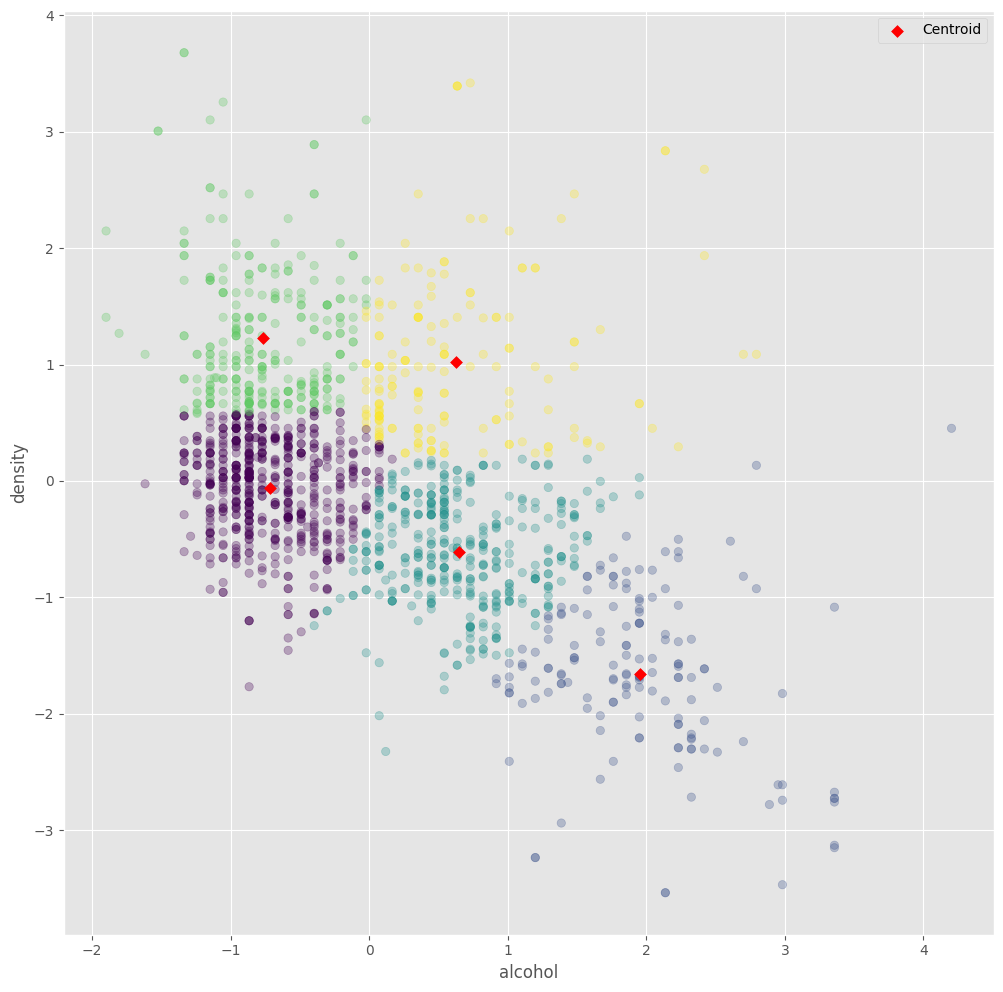

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
plt.scatter(xs, ys, c = labels, alpha = 0.3)
plt.scatter(x, y,c = 'red', marker = 'D', label = "Centroid")
plt.xlabel("alcohol")
plt.ylabel("density")
plt.legend()
plt.show()